# Quantum Process Tomography

In this notebook we will work through different tomography schemes, building up in complexity. With the ultimate goal to work towards Quantum Process Tomography.

*Contributors*: Boran Apak, Yorgos Sotiropoulos  and Joost van der Zalm (for the Quantum Information Project [AP3421]) 

## 1.a) Single Qubit State Tomography

First we will look at measuring a **single pure state**.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import qiskit as qk
import math
from quantuminspire.qiskit import QI
from quantuminspire.credentials import save_account
#save_account('7ff8243ba6d4643e4ec1774b7079f8086df7e872')
#QI.set_authentication()
from qiskit import Aer  # for simulating on own pc
qi_backend = Aer.get_backend('qasm_simulator') #QI.get_backend('QX single-node simulator') # Possible options: 'QX single-node simulator', 'Spin-2', 'Starmon-5'

Experiment for measuring the expectation value in the X direction
      ┌───┐┌───┐┌──────────┐┌─┐
q0_0: ┤ H ├┤ T ├┤ RY(-π/2) ├┤M├
      └───┘└───┘└──────────┘└╥┘
c0: 1/═══════════════════════╩═
                             0 

State	Counts
0	215
1	41
The expected X value = 0.6796875
Experiment for measuring the expectation value in the Y direction
      ┌───┐┌───┐┌─────────┐┌─┐
q5_0: ┤ H ├┤ T ├┤ RX(π/2) ├┤M├
      └───┘└───┘└─────────┘└╥┘
c1: 1/══════════════════════╩═
                            0 

State	Counts
0	214
1	42
The expected Y value = 0.671875
Experiment for measuring the expectation value in the Z direction
       ┌───┐┌───┐┌─┐
q10_0: ┤ H ├┤ T ├┤M├
       └───┘└───┘└╥┘
 c2: 1/═══════════╩═
                  0 

State	Counts
0	131
1	125
The expected Z value = 0.0234375


After the experiments we find the following bloch vector [0.6796875, 0.671875, 0.0234375]


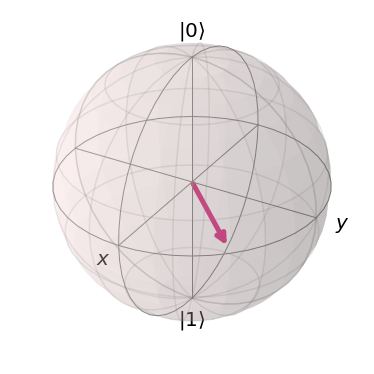

In [2]:
qubit_state_vector = [0, 0, 0]
i=0
for direction in ['X','Y','Z']:
    print('Experiment for measuring the expectation value in the', direction, 'direction')
    
    ## Setting up experiment
    q = qk.QuantumRegister(1)         # Create a Quantum register of 1 qubit
    c = qk.ClassicalRegister(1)       # Create a Classical register of 1 bit

    circuit = qk.QuantumCircuit(q,c)  # Create a Quantum Circuit acting on a quantum register of 1 qubit
    circuit.h(0)                      # Add a H gate on qubit 0, putting this qubit in superposition.
    circuit.t(0)                      # Add a T gate on qubit 0, rotating it by pi/4 around the z-axis
    if direction == 'X' : circuit.ry(-math.pi/2, 0)
    if direction == 'Y' : circuit.rx(math.pi/2, 0)
    circuit.measure(q,c)              # Do a measurement in the standard basis
    print(circuit)                    # Circuit can simply be printed in this way

    ## Measuring the the expected value
    number_of_shots = 256
    qi_job = qk.execute(circuit, backend=qi_backend, shots=number_of_shots)
    qi_result = qi_job.result()
    histogram = qi_result.get_counts(circuit)
    print('\nState\tCounts')
    expected_value = 0
    for state, counts in histogram.items():
        print('{0}\t{1}'.format(state, counts))
        expected_value += (-1)**int(state) * int(counts)
    expected_value = expected_value / number_of_shots
    qubit_state_vector[i] = expected_value
    i += 1
    print('The expected', direction, 'value =', str(expected_value))
    
print('\n\nAfter the experiments we find the following bloch vector', str(qubit_state_vector))
qk.visualization.plot_bloch_vector(qubit_state_vector)

## 1.b) Single Qubit State Tomography
Second let's look at measuring a **Maximally mixed state**.

Experiment for measuring the expectation value in the X direction
       ┌───┐     ┌──────────┐┌─┐
q14_0: ┤ H ├──■──┤ RY(-π/2) ├┤M├
       └───┘┌─┴─┐└──────────┘└╥┘
q14_1: ─────┤ X ├─────────────╫─
            └───┘             ║ 
 c3: 1/═══════════════════════╩═
                              0 

State	Counts
0	125
1	131
The expected X value = -0.0234375
Experiment for measuring the expectation value in the Y direction
       ┌───┐     ┌─────────┐┌─┐
q19_0: ┤ H ├──■──┤ RX(π/2) ├┤M├
       └───┘┌─┴─┐└─────────┘└╥┘
q19_1: ─────┤ X ├────────────╫─
            └───┘            ║ 
 c4: 1/══════════════════════╩═
                             0 

State	Counts
0	126
1	130
The expected Y value = -0.015625
Experiment for measuring the expectation value in the Z direction
       ┌───┐     ┌─┐
q24_0: ┤ H ├──■──┤M├
       └───┘┌─┴─┐└╥┘
q24_1: ─────┤ X ├─╫─
            └───┘ ║ 
 c5: 1/═══════════╩═
                  0 

State	Counts
0	137
1	119
The expected Z value = 0.0703125


After the experiment

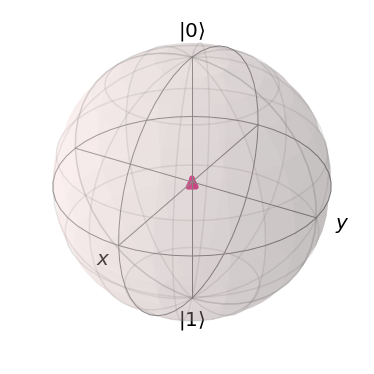

In [3]:
qubit_state_vector = [0, 0, 0]
i=0
for direction in ['X','Y','Z']:
    print('Experiment for measuring the expectation value in the', direction, 'direction')
    
    ## Setting up experiment
    q = qk.QuantumRegister(2)         # Create a Quantum register of 1 qubit
    c = qk.ClassicalRegister(1)       # Create a Classical register of 1 bit

    circuit = qk.QuantumCircuit(q,c)  # Create a Quantum Circuit acting on a quantum register of 1 qubit
    circuit.h(0)                      # Add a H gate on qubit 0, putting this qubit in superposition.
    circuit.cx(q[0], q[1])            # Add a control-X gate with qubit 0 the control, and qubit 1 the target
    if direction == 'X' : circuit.ry(-math.pi/2, 0)
    if direction == 'Y' : circuit.rx(math.pi/2, 0)
    circuit.measure(q[0],c)           # Do a measurement in the standard basis
    print(circuit)                    # Circuit can simply be printed in this way

    ## Measuring the the expected value
    number_of_shots = 256
    qi_job = qk.execute(circuit, backend=qi_backend, shots=number_of_shots)
    qi_result = qi_job.result()
    histogram = qi_result.get_counts(circuit)
    print('\nState\tCounts')
    expected_value = 0
    for state, counts in histogram.items():
        print('{0}\t{1}'.format(state, counts))
        expected_value += (-1)**int(state) * int(counts)
    expected_value = expected_value / number_of_shots
    qubit_state_vector[i] = expected_value
    i += 1
    print('The expected', direction, 'value =', str(expected_value))

print('\n\nAfter the experiments we find the following bloch vector', str(qubit_state_vector))
qk.visualization.plot_bloch_vector(qubit_state_vector)

## 1.c) Single Qubit State Tomography
Third let's look at measuring an **Intermediate maximally mixed state**.

Experiment for measuring the expectation value in the X direction
       ┌──────────┐     ┌──────────┐┌─┐
q28_0: ┤ RY(-π/4) ├──■──┤ RY(-π/2) ├┤M├
       └──────────┘┌─┴─┐└──────────┘└╥┘
q28_1: ────────────┤ X ├─────────────╫─
                   └───┘             ║ 
 c6: 1/══════════════════════════════╩═
                                     0 

State	Counts
0	132
1	124
The expected X value = 0.03125
Experiment for measuring the expectation value in the Y direction
       ┌──────────┐     ┌─────────┐┌─┐
q32_0: ┤ RY(-π/4) ├──■──┤ RX(π/2) ├┤M├
       └──────────┘┌─┴─┐└─────────┘└╥┘
q32_1: ────────────┤ X ├────────────╫─
                   └───┘            ║ 
 c7: 1/═════════════════════════════╩═
                                    0 

State	Counts
0	134
1	122
The expected Y value = 0.046875
Experiment for measuring the expectation value in the Z direction
       ┌──────────┐     ┌─┐
q37_0: ┤ RY(-π/4) ├──■──┤M├
       └──────────┘┌─┴─┐└╥┘
q37_1: ────────────┤ X ├─╫─
                   └──

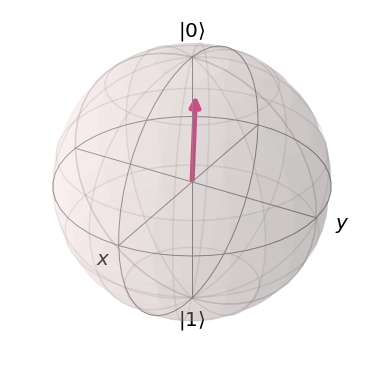

In [4]:
qubit_state_vector = [0, 0, 0]
i=0
for direction in ['X','Y','Z']:
    print('Experiment for measuring the expectation value in the', direction, 'direction')
    
    ## Setting up experiment
    q = qk.QuantumRegister(2)         # Create a Quantum register of 1 qubit
    c = qk.ClassicalRegister(1)       # Create a Classical register of 1 bit

    circuit = qk.QuantumCircuit(q,c)  # Create a Quantum Circuit acting on a quantum register of 1 qubit
    circuit.ry(-math.pi/4, q[0])      # Add a RY gate on qubit 0, putting this qubit in in intermediate state
    circuit.cx(q[0], q[1])            # Add a control-X gate with qubit 0 the control, and qubit 1 the target
    if direction == 'X' : circuit.ry(-math.pi/2, 0)
    if direction == 'Y' : circuit.rx(math.pi/2, 0)
    circuit.measure(q[0],c)           # Do a measurement in the standard basis
    print(circuit)                    # Circuit can simply be printed in this way

    ## Measuring the the expected value
    number_of_shots = 256
    qi_job = qk.execute(circuit, backend=qi_backend, shots=number_of_shots)
    qi_result = qi_job.result()
    histogram = qi_result.get_counts(circuit)
    print('\nState\tCounts')
    expected_value = 0
    for state, counts in histogram.items():
        print('{0}\t{1}'.format(state, counts))
        expected_value += (-1)**int(state) * int(counts)
    expected_value = expected_value / number_of_shots
    qubit_state_vector[i] = expected_value
    i += 1
    print('The expected', direction, 'value =', str(expected_value))

print('\n\nAfter the experiments we find the following bloch vector', str(qubit_state_vector))
qk.visualization.plot_bloch_vector(qubit_state_vector)

## 1.d) Single Qubit Process Tomography
Third let's look at measuring with an overcomplete set of inputs. Where we still apply some gates as 'process'.

Experiment for measuring the expectation value in the X direction
       ┌─────────────────┐┌───┐┌──────────┐┌─┐
q41_0: ┤ initialize(1,0) ├┤ H ├┤ RY(-π/2) ├┤M├
       └─────────────────┘└───┘└──────────┘└╥┘
q41_1: ─────────────────────────────────────╫─
                                            ║ 
 c9: 1/═════════════════════════════════════╩═
                                            0 

State	Counts
0	4096
The expected X value = 1.0 


Experiment for measuring the expectation value in the Y direction
       ┌─────────────────┐┌───┐┌─────────┐┌─┐
q46_0: ┤ initialize(1,0) ├┤ H ├┤ RX(π/2) ├┤M├
       └─────────────────┘└───┘└─────────┘└╥┘
q46_1: ────────────────────────────────────╫─
                                           ║ 
c10: 1/════════════════════════════════════╩═
                                           0 

State	Counts
0	2057
1	2039
The expected Y value = 0.00439453125 


Experiment for measuring the expectation value in the Z direction
       ┌─────────────────┐┌───┐┌

State	Counts
0	4096
The expected Y value = 1.0 


Experiment for measuring the expectation value in the Z direction
        ┌───────────────────────────────┐┌───┐┌─┐
q121_0: ┤ initialize(0.70711,-0.70711j) ├┤ H ├┤M├
        └───────────────────────────────┘└───┘└╥┘
q121_1: ───────────────────────────────────────╫─
                                               ║ 
 c26: 1/═══════════════════════════════════════╩═
                                               0 

State	Counts
0	2014
1	2082
The expected Z value = -0.0166015625 




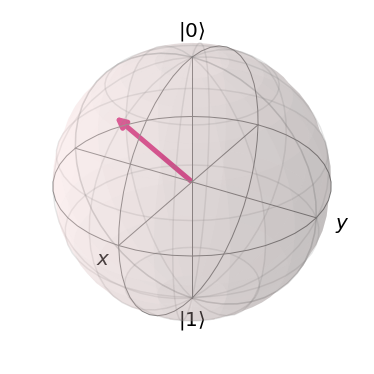

In [5]:
# The states we have here are the following: ['0', '1', '+', '-', 'i', '-i'] 
states = [np.array([1,0]),np.array([0,1]),1/np.sqrt(2) * np.array([1,1]), \
          1/np.sqrt(2) * np.array([1,-1]), 1/np.sqrt(2) * np.array([1, complex(0,1)]), 1/np.sqrt(2) * np.array([1, complex(0,-1)])]
possible_directions = ['X', 'Y', 'Z']
expected_values = np.zeros((6,4))

pauli_x = np.array([[0,1],[1,0]]) 
pauli_y = np.array([[0,complex(0,-1)],[complex(0,1),0]]) 
pauli_z = np.array([[1,0],[0,-1]])

input_expected_values = np.zeros((6,4))

j=0
for initial_state in states:
    input_expected_values[j,0] = 1 
    expected_values[j,0] = 1 
    i=1
    for direction in possible_directions:
        
        if direction == 'X' : 
            input_expected_values[j,i] = np.real(np.matrix(initial_state).conjugate() * pauli_x * np.matrix(initial_state).transpose())
        if direction == 'Y' : 
            input_expected_values[j,i] = np.real(np.matrix(initial_state).conjugate() * pauli_y * np.matrix(initial_state).transpose())
        if direction == 'Z' : 
            input_expected_values[j,i] = np.real(np.matrix(initial_state).conjugate() * pauli_z * np.matrix(initial_state).transpose())
            
        print('Experiment for measuring the expectation value in the', direction, 'direction')

        ## Setting up experiment
        q = qk.QuantumRegister(2)         # Create a Quantum register of 1 qubit
        c = qk.ClassicalRegister(1)       # Create a Classical register of 1 bit
        
        circuit = qk.QuantumCircuit(q,c)  # Create a Quantum Circuit acting on a quantum register of 1 qubit
        
        circuit.initialize(initial_state, 0)  # Initialize the 0th qubit using a complex vector
            
        
        #circuit.rz(math.pi/5,0)           # Rotate by pi/5 around the z-axis
        #circuit.rx(math.pi,0)             # Rotate by pi around the x-axis
        circuit.h(0)                      # Apply a hadamard gate
        
        if direction == 'X' : 
            circuit.ry(-math.pi/2, 0)
        elif direction == 'Y' : 
            circuit.rx(math.pi/2, 0)
        circuit.measure(q[0],c)           # Do a measurement in the standard basis
        print(circuit)                    # Circuit can simply be printed in this way

        ## Measuring the the expected value
        number_of_shots = 4096
        qi_job = qk.execute(circuit, backend=qi_backend, shots=number_of_shots)
        qi_result = qi_job.result()
        histogram = qi_result.get_counts(circuit)
        print('\nState\tCounts')
        expected_value = 0
        for state, counts in histogram.items():
            print('{0}\t{1}'.format(state, counts))
            expected_value += (-1)**int(state) * int(counts)
        expected_values[j,i] = expected_value / number_of_shots
        print('The expected', direction, 'value =', str(expected_values[j,i]),'\n\n')
        i += 1 
    j += 1

    
qk.visualization.plot_bloch_vector(expected_values[0])
qk.visualization.plot_bloch_vector(expected_values[1])
qk.visualization.plot_bloch_vector(expected_values[2])
qk.visualization.plot_bloch_vector(expected_values[3])
qk.visualization.plot_bloch_vector(expected_values[4])
qk.visualization.plot_bloch_vector(expected_values[5])

[[ 1.  0.  0.  1.]
 [ 1.  0.  0. -1.]
 [ 1.  1.  0.  0.]
 [ 1. -1.  0.  0.]
 [ 1.  0.  1.  0.]
 [ 1.  0. -1.  0.]]
[[ 1.00000000e+00 -2.22044605e-16 -5.55111512e-17  1.66533454e-16]
 [ 1.95312500e-03  4.88281250e-03  3.02734375e-02  1.00000000e+00]
 [-6.67317708e-03  5.85937500e-03 -1.00000000e+00  6.83593750e-03]
 [-7.40559896e-03  1.00000000e+00  4.39453125e-03 -7.56835937e-03]]  = 
 [[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00 -1.00000000e+00 -9.76562500e-04 -1.07421875e-02
   4.19921875e-02 -1.85546875e-02]
 [ 4.39453125e-03 -9.27734375e-03 -1.17187500e-02 -2.34375000e-02
  -1.00000000e+00  1.00000000e+00]
 [-1.75781250e-02 -2.44140625e-03  1.00000000e+00 -1.00000000e+00
  -7.81250000e-03 -1.66015625e-02]]  * 
 [[ 1.66666667e-01 -1.38777878e-16 -5.03069808e-17  5.00000000e-01]
 [ 1.66666667e-01  2.77555756e-17  7.28583860e-17 -5.00000000e-01]
 [ 1.66666667e-01  5.00000000e-01  0.00000000e+00  5.55111512e-17]


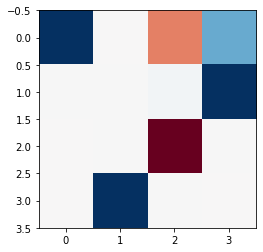

In [6]:
inverse_input_matrix = np.linalg.pinv(np.matrix(input_expected_values.transpose()))
Transfer_matrix = np.matrix(expected_values).transpose() * np.matrix(inverse_input_matrix)

print(input_expected_values)

print(Transfer_matrix, ' = \n', np.matrix(expected_values).transpose(), ' * \n', np.matrix(inverse_input_matrix))

print('\n', inverse_input_matrix.transpose() * np.matrix(input_expected_values))
offset = np.zeros(np.shape(Transfer_matrix))
offset[0,3] = 0.5
offset[0,2] = -0.5
plt.imshow(Transfer_matrix + offset, interpolation='nearest', cmap=cm.RdBu)
plt.show()

## 2 Qubit State Tomography
When looking at Qubit State Tomography for 2 qubits we find that there are 16 different correlations that we could measure.

| Q0 \| Q1           | I              | X              | Y              | Z              |
|:------------------:|:--------------:|:--------------:|:--------------:|:--------------:|
| I                  | \&lt; II \&gt; | \&lt; IX \&gt; | \&lt; IY \&gt; | \&lt; IZ \&gt; |
| X                  | \&lt; XI \&gt; | \&lt; XX \&gt; | \&lt; XY \&gt; | \&lt; XZ \&gt; |
| Y                  | \&lt; YI\&gt;  | \&lt; YX \&gt; | \&lt; YY \&gt; | \&lt; YZ \&gt; |
| Z                  | \&lt; ZI\&gt;  | \&lt; ZX \&gt; | \&lt; ZY \&gt; | \&lt; ZZ \&gt; |
    

In [7]:
expectations = np.zeros((4, 4))
expectations[0,0] = 1

i=0
possible_directions = ['I', 'X','Y', 'Z']

for direction1 in possible_directions:
    j=0
    for direction2 in possible_directions:
        
        combined_directions = direction1 + direction2
        if combined_directions == 'II' : continue  # For the II case we don't need a circuit
        print("Let's find the expectation value for the", direction1, direction2, 'measurements')
        
        # Define circuit
        q = qk.QuantumRegister(2)
        c = qk.ClassicalRegister(2)
        circuit = qk.QuantumCircuit(q, c)
        circuit.h(q[0])
        circuit.cx(q[0], q[1])
        
        # Rotate to make measurements in different bases
        if direction1 == 'X' : 
            circuit.ry(-math.pi/2, q[0])
        elif direction1 == 'Y' : 
            circuit.rx(math.pi/2, q[0])
        if direction2 == 'X' : 
            circuit.ry(-math.pi/2, q[1])
        elif direction2 == 'Y' : circuit.rx(math.pi/2, q[1])
        
        if direction1 == 'I': 
            circuit.measure(q[1], c[1]) # The first bit doesn't need to be measured
        elif direction2 == 'I': 
            circuit.measure(q[0], c[0]) # The second bit doesn't need to be measured
        else : 
            circuit.measure(q, c)    # Now we want to measure both bits
        
        #print(circuit)  # To shorten run-time this can be left out
        
        # Define the experiment
        number_of_shots = 512
        qi_job = qk.execute(circuit, backend=qi_backend, shots=number_of_shots)
        qi_result = qi_job.result()
        
        # Look at the results
        histogram = qi_result.get_counts(circuit)
        print('\nState\tCounts')
        
        # Add the results to the results matrix
        expected_value = 0
        if direction1 == 'I':   # If one of the qubits isn't measured the calculation changes a little bit
            for state, counts in histogram.items() :
                print('{0}\t{1}'.format(state, counts))
                expected_value += (-1)**int(state[1]) * int(counts)
        elif direction2 == 'I':
            for state, counts in histogram.items() :
                print('{0}\t{1}'.format(state, counts))
                expected_value += (-1)**int(state[0]) * int(counts)
        else:
            for state, counts in histogram.items() :
                print('{0}\t{1}'.format(state, counts))
                expected_value += (-1)**(int(state[0])+int(state[1]))*int(counts)
            
        expected_value = expected_value / number_of_shots
        expectations[i,j] = expected_value
        print('For the', direction1, direction2, 'measurements, the expected value=', str(expected_value))
        print('\n')
    
        j += 1
    i += 1

print(expectations)

Let's find the expectation value for the I X measurements

State	Counts
00	249
10	263
For the I X measurements, the expected value= 1.0


Let's find the expectation value for the I Y measurements

State	Counts
00	247
10	265
For the I Y measurements, the expected value= 1.0


Let's find the expectation value for the I Z measurements

State	Counts
00	270
10	242
For the I Z measurements, the expected value= 1.0


Let's find the expectation value for the X I measurements

State	Counts
00	258
01	254
For the X I measurements, the expected value= 1.0


Let's find the expectation value for the X X measurements

State	Counts
00	252
11	260
For the X X measurements, the expected value= 1.0


Let's find the expectation value for the X Y measurements

State	Counts
00	116
01	149
10	128
11	119
For the X Y measurements, the expected value= -0.08203125


Let's find the expectation value for the X Z measurements

State	Counts
00	129
01	146
10	98
11	139
For the X Z measurements, the expected value= 0.046

## 3 Two Qubit Process Tomography for given states
 Let's see what happens if we try to feed cardinal states before the process

In [8]:

states = [np.array([1,0]),np.array([0,1]),1/np.sqrt(2) * np.array([1,1]), \
          1/np.sqrt(2) * np.array([1,-1]), 1/np.sqrt(2) * np.array([1, complex(0,1)]), 1/np.sqrt(2) * np.array([1, complex(0,-1)])]
possible_directions = ['I', 'X','Y', 'Z']

pauli_x = np.array([[0,1],[1,0]]) 
pauli_y = np.array([[0,complex(0,-1)],[complex(0,1),0]]) 
pauli_z = np.array([[1,0],[0,-1]])

output_expected_values = np.zeros((36, 16))
input_expected_values = np.zeros((36, 16))

k=0
m=0                      # goes from 0 to 35
for state1 in states:
    l=0
    for state2 in states:
        i=0
        n=0              # goes from 0 to 15
        for direction1 in possible_directions:
            j=0
            
            for direction2 in possible_directions:
                
                if direction1 == 'I' : 
                    input_expected_values[m,n] = 1
                if direction1 == 'X' : 
                    input_expected_values[m,n] = np.real(np.matrix(state1).conjugate() * pauli_x * np.matrix(state1).transpose())
                if direction1 == 'Y' : 
                    input_expected_values[m,n] = np.real(np.matrix(state1).conjugate() * pauli_y * np.matrix(state1).transpose())
                if direction1 == 'Z' : 
                    input_expected_values[m,n] = np.real(np.matrix(state1).conjugate() * pauli_z * np.matrix(state1).transpose())
                    
                if direction2 == 'X' : 
                    input_expected_values[m,n] *= np.real(np.matrix(state2).conjugate() * pauli_x * np.matrix(state2).transpose())
                if direction2 == 'Y' : 
                    input_expected_values[m,n] *= np.real(np.matrix(state2).conjugate() * pauli_y * np.matrix(state2).transpose())
                if direction2 == 'Z' : 
                    input_expected_values[m,n] *= np.real(np.matrix(state2).conjugate() * pauli_z * np.matrix(state2).transpose())
                
                combined_directions = direction1 + direction2
                if combined_directions == 'II' : # For the II case we don't need a circuit
                    output_expected_values[m,n] = 1
                    j += 1
                    n += 1
                    continue  
                #print("Let's find the expectation value for the", direction1, direction2, 'measurements')

                # Define circuit
                q = qk.QuantumRegister(2)
                c = qk.ClassicalRegister(2)
                circuit = qk.QuantumCircuit(q, c)
                
                # Do some initialization for the input states
                circuit.initialize(state1, 0)  # Initialize the 0th qubit using a complex vector
                circuit.initialize(state2, 1)  # Initialize the 1st qubit using a complex vector
                    
                # The gates for the process
                #circuit.h(q[0])
                #circuit.cx(q[0], q[1])

                # Rotate to make measurements in different bases
                if direction1 == 'X' : 
                    circuit.ry(-math.pi/2, q[0])
                elif direction1 == 'Y' : 
                    circuit.rx(math.pi/2, q[0])
                if direction2 == 'X' : 
                    circuit.ry(-math.pi/2, q[1])
                elif direction2 == 'Y' : circuit.rx(math.pi/2, q[1])

                if direction1 == 'I': 
                    circuit.measure(q[1], c[1]) # The first bit doesn't need to be measured
                elif direction2 == 'I': 
                    circuit.measure(q[0], c[0]) # The second bit doesn't need to be measured
                else : 
                    circuit.measure(q, c)    # Now we want to measure both bits

                #print(circuit)  # To shorten run-time this can be left out

                # Define the experiment
                number_of_shots = 4096
                qi_job = qk.execute(circuit, backend=qi_backend, shots=number_of_shots)
                qi_result = qi_job.result()

                # Look at the results
                histogram = qi_result.get_counts(circuit)
                #print('\nState\tCounts')  # To shorten run-time this can be left out

                # Add the results to the results matrix
                expected_value = 0
                for state, counts in histogram.items() :
                    #print('{0}\t{1}'.format(state, counts))  # To shorten run-time this can be left out
                    expected_value += (-1)**(int(state[0])+int(state[1]))*int(counts)

                expected_value = expected_value / number_of_shots
                output_expected_values[m,n] = expected_value
                #print('For the', direction1, direction2, 'measurements, the expected value=', str(expected_value))
                #print('\n')
                print('i = ',i,'\nj = ',j,'\nk = ',k,'\nl = ',l,'\nm = ',m,'\nn = ',n)
                print('--------------------------------------------\n')
                j += 1
                n += 1
            i += 1
        l += 1
        m += 1
    k += 1

i =  0 
j =  1 
k =  0 
l =  0 
m =  0 
n =  1
--------------------------------------------

i =  0 
j =  2 
k =  0 
l =  0 
m =  0 
n =  2
--------------------------------------------

i =  0 
j =  3 
k =  0 
l =  0 
m =  0 
n =  3
--------------------------------------------

i =  1 
j =  0 
k =  0 
l =  0 
m =  0 
n =  4
--------------------------------------------

i =  1 
j =  1 
k =  0 
l =  0 
m =  0 
n =  5
--------------------------------------------

i =  1 
j =  2 
k =  0 
l =  0 
m =  0 
n =  6
--------------------------------------------

i =  1 
j =  3 
k =  0 
l =  0 
m =  0 
n =  7
--------------------------------------------

i =  2 
j =  0 
k =  0 
l =  0 
m =  0 
n =  8
--------------------------------------------

i =  2 
j =  1 
k =  0 
l =  0 
m =  0 
n =  9
--------------------------------------------

i =  2 
j =  2 
k =  0 
l =  0 
m =  0 
n =  10
--------------------------------------------

i =  2 
j =  3 
k =  0 
l =  0 
m =  0 
n =  11
---------------------

i =  3 
j =  2 
k =  0 
l =  5 
m =  5 
n =  14
--------------------------------------------

i =  3 
j =  3 
k =  0 
l =  5 
m =  5 
n =  15
--------------------------------------------

i =  0 
j =  1 
k =  1 
l =  0 
m =  6 
n =  1
--------------------------------------------

i =  0 
j =  2 
k =  1 
l =  0 
m =  6 
n =  2
--------------------------------------------

i =  0 
j =  3 
k =  1 
l =  0 
m =  6 
n =  3
--------------------------------------------

i =  1 
j =  0 
k =  1 
l =  0 
m =  6 
n =  4
--------------------------------------------

i =  1 
j =  1 
k =  1 
l =  0 
m =  6 
n =  5
--------------------------------------------

i =  1 
j =  2 
k =  1 
l =  0 
m =  6 
n =  6
--------------------------------------------

i =  1 
j =  3 
k =  1 
l =  0 
m =  6 
n =  7
--------------------------------------------

i =  2 
j =  0 
k =  1 
l =  0 
m =  6 
n =  8
--------------------------------------------

i =  2 
j =  1 
k =  1 
l =  0 
m =  6 
n =  9
---------------------

i =  3 
j =  0 
k =  1 
l =  5 
m =  11 
n =  12
--------------------------------------------

i =  3 
j =  1 
k =  1 
l =  5 
m =  11 
n =  13
--------------------------------------------

i =  3 
j =  2 
k =  1 
l =  5 
m =  11 
n =  14
--------------------------------------------

i =  3 
j =  3 
k =  1 
l =  5 
m =  11 
n =  15
--------------------------------------------

i =  0 
j =  1 
k =  2 
l =  0 
m =  12 
n =  1
--------------------------------------------

i =  0 
j =  2 
k =  2 
l =  0 
m =  12 
n =  2
--------------------------------------------

i =  0 
j =  3 
k =  2 
l =  0 
m =  12 
n =  3
--------------------------------------------

i =  1 
j =  0 
k =  2 
l =  0 
m =  12 
n =  4
--------------------------------------------

i =  1 
j =  1 
k =  2 
l =  0 
m =  12 
n =  5
--------------------------------------------

i =  1 
j =  2 
k =  2 
l =  0 
m =  12 
n =  6
--------------------------------------------

i =  1 
j =  3 
k =  2 
l =  0 
m =  12 
n =  7
--------

i =  2 
j =  3 
k =  2 
l =  5 
m =  17 
n =  11
--------------------------------------------

i =  3 
j =  0 
k =  2 
l =  5 
m =  17 
n =  12
--------------------------------------------

i =  3 
j =  1 
k =  2 
l =  5 
m =  17 
n =  13
--------------------------------------------

i =  3 
j =  2 
k =  2 
l =  5 
m =  17 
n =  14
--------------------------------------------

i =  3 
j =  3 
k =  2 
l =  5 
m =  17 
n =  15
--------------------------------------------

i =  0 
j =  1 
k =  3 
l =  0 
m =  18 
n =  1
--------------------------------------------

i =  0 
j =  2 
k =  3 
l =  0 
m =  18 
n =  2
--------------------------------------------

i =  0 
j =  3 
k =  3 
l =  0 
m =  18 
n =  3
--------------------------------------------

i =  1 
j =  0 
k =  3 
l =  0 
m =  18 
n =  4
--------------------------------------------

i =  1 
j =  1 
k =  3 
l =  0 
m =  18 
n =  5
--------------------------------------------

i =  1 
j =  2 
k =  3 
l =  0 
m =  18 
n =  6
-------

i =  3 
j =  1 
k =  3 
l =  5 
m =  23 
n =  13
--------------------------------------------

i =  3 
j =  2 
k =  3 
l =  5 
m =  23 
n =  14
--------------------------------------------

i =  3 
j =  3 
k =  3 
l =  5 
m =  23 
n =  15
--------------------------------------------

i =  0 
j =  1 
k =  4 
l =  0 
m =  24 
n =  1
--------------------------------------------

i =  0 
j =  2 
k =  4 
l =  0 
m =  24 
n =  2
--------------------------------------------

i =  0 
j =  3 
k =  4 
l =  0 
m =  24 
n =  3
--------------------------------------------

i =  1 
j =  0 
k =  4 
l =  0 
m =  24 
n =  4
--------------------------------------------

i =  1 
j =  1 
k =  4 
l =  0 
m =  24 
n =  5
--------------------------------------------

i =  1 
j =  2 
k =  4 
l =  0 
m =  24 
n =  6
--------------------------------------------

i =  1 
j =  3 
k =  4 
l =  0 
m =  24 
n =  7
--------------------------------------------

i =  2 
j =  0 
k =  4 
l =  0 
m =  24 
n =  8
---------

i =  2 
j =  2 
k =  4 
l =  5 
m =  29 
n =  10
--------------------------------------------

i =  2 
j =  3 
k =  4 
l =  5 
m =  29 
n =  11
--------------------------------------------

i =  3 
j =  0 
k =  4 
l =  5 
m =  29 
n =  12
--------------------------------------------

i =  3 
j =  1 
k =  4 
l =  5 
m =  29 
n =  13
--------------------------------------------

i =  3 
j =  2 
k =  4 
l =  5 
m =  29 
n =  14
--------------------------------------------

i =  3 
j =  3 
k =  4 
l =  5 
m =  29 
n =  15
--------------------------------------------

i =  0 
j =  1 
k =  5 
l =  0 
m =  30 
n =  1
--------------------------------------------

i =  0 
j =  2 
k =  5 
l =  0 
m =  30 
n =  2
--------------------------------------------

i =  0 
j =  3 
k =  5 
l =  0 
m =  30 
n =  3
--------------------------------------------

i =  1 
j =  0 
k =  5 
l =  0 
m =  30 
n =  4
--------------------------------------------

i =  1 
j =  1 
k =  5 
l =  0 
m =  30 
n =  5
------

i =  2 
j =  0 
k =  5 
l =  5 
m =  35 
n =  8
--------------------------------------------

i =  2 
j =  1 
k =  5 
l =  5 
m =  35 
n =  9
--------------------------------------------

i =  2 
j =  2 
k =  5 
l =  5 
m =  35 
n =  10
--------------------------------------------

i =  2 
j =  3 
k =  5 
l =  5 
m =  35 
n =  11
--------------------------------------------

i =  3 
j =  0 
k =  5 
l =  5 
m =  35 
n =  12
--------------------------------------------

i =  3 
j =  1 
k =  5 
l =  5 
m =  35 
n =  13
--------------------------------------------

i =  3 
j =  2 
k =  5 
l =  5 
m =  35 
n =  14
--------------------------------------------

i =  3 
j =  3 
k =  5 
l =  5 
m =  35 
n =  15
--------------------------------------------



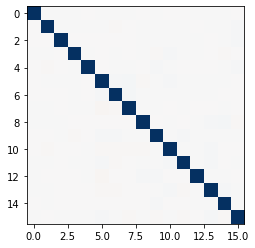

In [9]:
inverse_input_matrix = np.linalg.pinv(np.matrix(input_expected_values.transpose()))
Transfer_matrix = np.matrix(output_expected_values).transpose() * np.matrix(inverse_input_matrix)

#print(input_expected_values)

#print(Transfer_matrix, ' = \n', np.matrix(output_expected_values).transpose(), ' * \n', np.matrix(inverse_input_matrix))

#print('\n', inverse_input_matrix.transpose() * np.matrix(input_expected_values))

plt.imshow(Transfer_matrix, vmin=-1, vmax=1, interpolation='nearest', cmap=cm.RdBu)
plt.show()


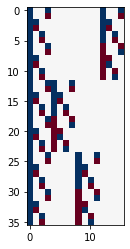

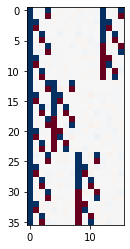

In [10]:
plt.imshow(input_expected_values, interpolation='nearest', cmap=cm.RdBu)
plt.show()

plt.imshow(output_expected_values, interpolation='nearest', cmap=cm.RdBu)
plt.show()


In [11]:
print(histogram.items())

dict_items([('00', 1014), ('01', 1046), ('10', 983), ('11', 1053)])
